In [1]:
# importing libraries
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for feature selection and dimensionality reduction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#libraries for Machine Learning and cross validation
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from datetime import datetime



[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
#data extraction from csv to dataframe 

df = pd.read_csv("C:\\Users\\sai\\Desktop\\Spam Classification Project\\spam_dataset.csv", encoding = 'latin-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [3]:
df.head()

,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text Preprocessing:
1 Removing Punctuations

2 Normalizing the text data to lower case

3 Stemmming

4 Removal of stop words

In [4]:
ps =  PorterStemmer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

##### Converting corpus to vector by using Tf-Idf 

In [6]:
tfidf = TfidfVectorizer(min_df = 0.1, max_df = 1.5, ngram_range = (1, 2))
x_tf_idf = tfidf.fit_transform(corpus).toarray()

y_tf_idf = pd.get_dummies(df['Status'])
y_tf_idf = y_tf_idf.iloc[:, 1]

print("Shape of x_tf_idf: ", x_tf_idf.shape)
print("\nShape of y_tf_idf: ", y_tf_idf.shape)

Shape of x_tf_idf:  (5572, 1)

Shape of y_tf_idf:  (5572,)


#### T-sne for dimensionality reduction

In [7]:

tsne_model = TSNE(n_components = 2, random_state = 0)
#tsne_data = tsne_model.fit_transform(x_tf_idf, y_tf_idf)
tsne_data = tsne_model.fit_transform(x_tf_idf)


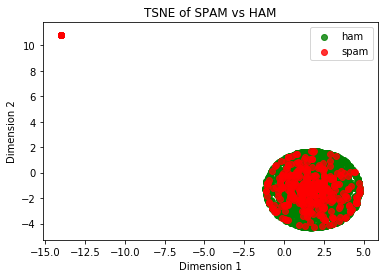

In [8]:
colors = ['green', 'red']
target_names = ['ham', 'spam']
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(tsne_data[y_tf_idf == i, 0], tsne_data[y_tf_idf == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of SPAM vs HAM')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [9]:
t_df = pd.DataFrame(tsne_data)

In [10]:
t_df.head()

,0,1
0,1.799722,-1.324282
1,1.799722,-1.324277
2,1.799721,-1.324351
3,1.799723,-1.324374
4,1.799688,-1.324360


In [11]:
t_df = t_df.join(y_tf_idf)

In [12]:
# considering X & y values for further machine learning algorithms
x = t_df.drop('spam', axis = 1)
y = t_df['spam']

### Implementing Machine Learning Algorithms, Approach 1 - Considering data resulted from application of t-sne algorithm


##### 1.Knn Algorithm

[0.8128111653261512, 0.8636027565276209, 0.8585751633823537, 0.8709597643018382, 0.8727570373191226, 0.8716795081916745, 0.8714999738206771, 0.8723986074359369, 0.8727567086308946, 0.8725768525157866, 0.8747357705426555, 0.8749149831695424, 0.8736592135916563, 0.8720424505938773, 0.8740182800189455, 0.8743763812139029, 0.8743763800565502, 0.8745555926834371, 0.8743767052727194]


Text(0.5, 1.0, 'Accuracy rate')

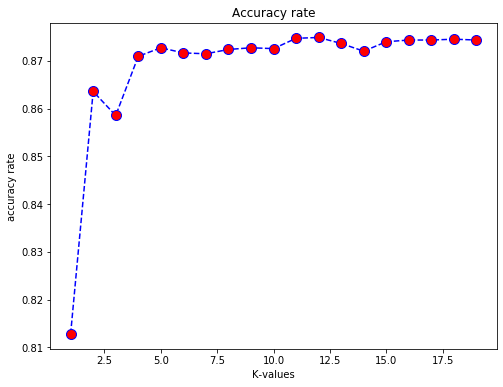

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

accuracy_rate_list = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, x, y, cv=10)
    accuracy_rate_list.append(score.mean())
print(accuracy_rate_list)
plt.figure(figsize=(8,6))
plt.plot(range(1,20), accuracy_rate_list, color='blue', linestyle='dashed', marker = 'o',markerfacecolor='red', markersize=10)
plt.xlabel('K-values')
plt.ylabel('accuracy rate')
plt.title('Accuracy rate')

In [14]:
#considering K-value as 11 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knnPred = knn.predict(x_test)

print("considering the above value of k we get...")
print("\n")
print("Confusion Knn based model matrix :- \n",confusion_matrix(y_test, knnPred))
print("\n")
print("Classification Knn based model report:- \n",classification_report(y_test, knnPred))

considering the above value of k we get...


Confusion Knn based model matrix :- 
 [[1354   96]
 [ 126   96]]


Classification Knn based model report:- 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1450
           1       0.50      0.43      0.46       222

    accuracy                           0.87      1672
   macro avg       0.71      0.68      0.69      1672
weighted avg       0.86      0.87      0.86      1672



##### 2. Support Vector Machine (SVM) Algorithm

In [15]:
svc = SVC()
svc.fit(x_train, y_train)
svcPred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("Accuracy score is : ",acc_svc)


C:\Users\sai\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score is :  87.64


In [16]:
print("Confusion matrix for SVM based model:- \n",confusion_matrix(y_test, svcPred))
print("\n")
print("Classification report for SVM based model:- \n",classification_report(y_test, svcPred))

Confusion matrix for SVM based model:- 
 [[1378   72]
 [ 122  100]]


Classification report for SVM based model:- 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1450
           1       0.58      0.45      0.51       222

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



##### 3. Decision Tree Algorithm

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dtPred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Accuracy score achieved by Decision tree : ", acc_decision_tree)


Accuracy score achieved by Decision tree :  95.23


In [18]:
print("Confusion matrix for Decision Tree based model:- \n",confusion_matrix(y_test, dtPred))
print("\n")
print("Classification report for Decision Tree based model:- \n",classification_report(y_test, dtPred))

Confusion matrix for Decision Tree based model:- 
 [[1272  178]
 [ 116  106]]


Classification report for Decision Tree based model:- 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1450
           1       0.37      0.48      0.42       222

    accuracy                           0.82      1672
   macro avg       0.64      0.68      0.66      1672
weighted avg       0.84      0.82      0.83      1672



##### 4. XGBoost Algorithm

In [19]:
# hyper parameter optimization
params = {
    
    "learning_rate"    :[0.05,0.10,0.15,0.20,0.25,0.30,0.35],
    "max_depth"        :[3,4,5,6,8,10,12,15],
    "gamma"            :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" :[0.3,0.4,0.5,0.7]
}

In [20]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time Taken: %i hours %i minutes %s seconds." % (thour, tmin, round(tsec,2)) )


In [21]:
xg_classifier = xgboost.XGBClassifier()

In [22]:
random_search = RandomizedSearchCV(xg_classifier, param_distributions=params, n_iter=5, scoring = 'roc_auc', n_jobs=-1, cv=5, verbose =3)

start_time = timer(None) # Timing for this algorthim starts from here for "start_time" variable
random_search.fit(x, y)
timer(start_time)# timing ends here for the same variable


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.5s finished


In [23]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.35, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
random_search.best_params_

{'max_depth': 4, 'learning_rate': 0.35, 'gamma': 0.0, 'colsample_bytree': 0.5}

In [25]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
classifier.fit(x_train, y_train)
xgbPred = classifier.predict(x_test)

In [27]:
score = cross_val_score(classifier, x, y, cv=10)

In [28]:
score

array([0.84408602, 0.88351254, 0.88709677, 0.87275986, 0.86200717,
       0.8940754 , 0.87253142, 0.88309353, 0.87410072, 0.89208633])

In [29]:
score.mean()

0.8765349763393087

In [30]:
# model_by_1 = []

# print("classification report for models by (appraoch-1), KNN, SVC, Decision Tree and XGBoost are: \n")
# for i in model:
#     print(classification_report(y_test, i))

### Approach 2 Consider LDA for dimensionality reduction


In [31]:
# Consideration of CountVectorization instead of Tf-idf.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_cv = cv.fit_transform(corpus).toarray()


#implementation of LDA algorithm for dimensionality reduction
sklearn_lda = LDA(n_components=1)
x_lda_sklearn = sklearn_lda.fit_transform(x_cv, y)

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


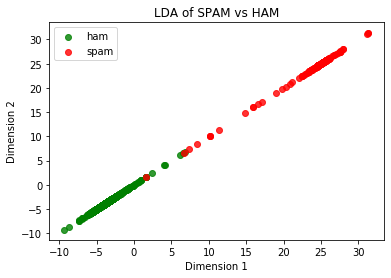

In [32]:
colors = ['green', 'red']
target_names = ['ham', 'spam']
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_lda_sklearn[y == i, 0], x_lda_sklearn[y == i, 0], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of SPAM vs HAM')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [33]:
n_df = pd.DataFrame(x_lda_sklearn)
n_df['spam'] = y
n_df['features'] = n_df.drop('spam', axis = 1)

In [34]:
n_df = n_df.iloc[:,1:3]

In [35]:
n_df

,spam,features
0,0,-3.883406
1,0,-4.215443
2,1,25.083576
3,0,-3.883406
4,0,-3.170752
...,...,...
5567,1,27.066322
5568,0,-4.170763
5569,0,-3.883406
5570,0,-3.883406


In [36]:
x_new = n_df['features']
y_new = n_df['spam']

print("x_new Shape is: ",  x_new.shape)
print("y_new Shape is: ",  y_new.shape)

x_new Shape is:  (5572,)
y_new Shape is:  (5572,)


In [37]:
x_new = np.array(x_new).reshape(-1,1)
y_new = np.array(y_new).reshape(-1,1)

In [38]:
print("x_new Shape is: ",  x_new.shape)
print("y_new Shape is: ",  y_new.shape)

x_new Shape is:  (5572, 1)
y_new Shape is:  (5572, 1)


### Implementation of ML algorithms Appraoch - 2 Considering data resulted from LDA algorithm

##### 1. Knn Algorithm

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30)

accuracy_rate_list = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, x_new, y_new, cv=10)
    accuracy_rate_list.append(score.mean())

print("Accuracy rate list is : ",accuracy_rate_list)

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

Accuracy rate list is :  [0.9989224755019638, 0.9992821877321797, 0.9992815430866058, 0.9994613992017136, 0.9992815430866058, 0.9994613992017136, 0.9996412553168215, 0.9994613992017136, 0.9992815430866058, 0.9992815430866058, 0.9991023316170716, 0.9992815430866058, 0.9992815430866058, 0.9992821877321797, 0.9992821877321797, 0.9992821877321797, 0.9992821877321797, 0.9991029762626455, 0.9991029762626455]


C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pas

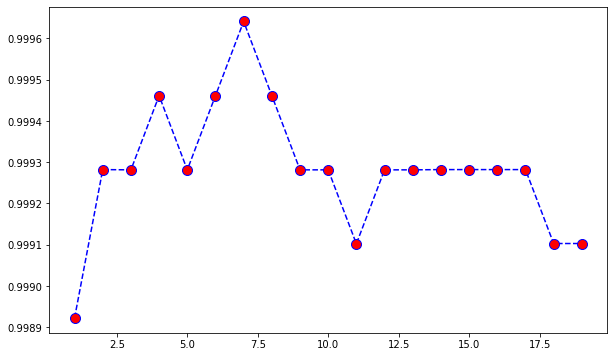

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), accuracy_rate_list, color='blue', linestyle='dashed', marker = 'o',markerfacecolor='red', markersize=10)


In [41]:
print("Min:- ", min(accuracy_rate_list))
print("Max:- ", max(accuracy_rate_list))

Min:-  0.9989224755019638
Max:-  0.9996412553168215


In [42]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("considering K = 11 we get...")
print("\n")
print("Confusion matrix :- \n",confusion_matrix(y_test, knn_pred))
print("\n")
print("Classification report:- \n",classification_report(y_test, knn_pred))

considering K = 11 we get...


Confusion matrix :- 
 [[1452    0]
 [   3  217]]


Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      0.99       220

    accuracy                           1.00      1672
   macro avg       1.00      0.99      1.00      1672
weighted avg       1.00      1.00      1.00      1672



C:\Users\sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


##### 2. Support Vector Management (SVM) Algorithm

In [43]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("Accuracy score by SVM : ", acc_svc)



C:\Users\sai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score by SVM :  99.97


In [44]:
print("Confusion matrix for SVM based model:- \n",confusion_matrix(y_test, svc_pred))
print("\n")
print("Classification report for SVM based model:- \n",classification_report(y_test, svc_pred))

Confusion matrix for SVM based model:- 
 [[1452    0]
 [   2  218]]


Classification report for SVM based model:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      1.00       220

    accuracy                           1.00      1672
   macro avg       1.00      1.00      1.00      1672
weighted avg       1.00      1.00      1.00      1672



##### 3. Decision Tree Algorithm

In [45]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)


In [46]:
print("Confusion matrix for DT based model:- \n",confusion_matrix(y_test, dt_pred))
print("\n")
print("Classification report for DT based model:- \n",classification_report(y_test, dt_pred))

Confusion matrix for DT based model:- 
 [[1452    0]
 [   3  217]]


Classification report for DT based model:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      0.99       220

    accuracy                           1.00      1672
   macro avg       1.00      0.99      1.00      1672
weighted avg       1.00      1.00      1.00      1672



##### 4. XGBoost Algorithm

In [47]:
# hyper parameter optimization
params = {
    
    "learning_rate"    :[0.05,0.10,0.15,0.20,0.25,0.30,0.35],
    "max_depth"        :[3,4,5,6,8,10,12,15],
    "gamma"            :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" :[0.3,0.4,0.5,0.7]
}

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time Taken: %i hours %i minutes %s seconds." % (thour, tmin, round(tsec,2)) )

In [49]:
xg_classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(xg_classifier, param_distributions=params, n_iter=5, scoring = 'roc_auc', n_jobs=-1, cv=5, verbose =3)


In [50]:
start_time = timer(None) # Timing for this algorthim starts from here for "start_time" variable
random_search.fit(x_new, y_new)
timer(start_time)# timing ends here for the same variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
random_search.best_params_

{'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.5}

In [53]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, x_new, y_new, cv=10)

C:\Users\sai\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sai\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
classifier.fit(x_train, y_train)
xgb_pred = classifier.predict(x_test)


In [56]:
score

array([1.        , 0.99820789, 1.        , 0.99820789, 1.        ,
       0.99820467, 1.        , 1.        , 0.99820144, 1.        ])

In [57]:
score.mean()

0.9992821877321795

In [58]:
print("Confusion matrix for XGboost based model:- \n",confusion_matrix(y_test, xgb_pred))
print("\n")
print("Classification report for XGBoost based model:- \n",classification_report(y_test, xgb_pred))

Confusion matrix for XGboost based model:- 
 [[1452    0]
 [   1  219]]


Classification report for XGBoost based model:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      1.00      1.00       220

    accuracy                           1.00      1672
   macro avg       1.00      1.00      1.00      1672
weighted avg       1.00      1.00      1.00      1672



In [59]:
model = [knn_pred, svc_pred, dt_pred, xgb_pred]

In [60]:
model

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [61]:
print("classification report for models by (appraoch-2), KNN, SVC, Decision Tree and XGBoost are: \n")
for i in model:
    print(classification_report(y_test, i))

classification report for models by (appraoch-2), KNN, SVC, Decision Tree and XGBoost are: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      0.99       220

    accuracy                           1.00      1672
   macro avg       1.00      0.99      1.00      1672
weighted avg       1.00      1.00      1.00      1672

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      1.00       220

    accuracy                           1.00      1672
   macro avg       1.00      1.00      1.00      1672
weighted avg       1.00      1.00      1.00      1672

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      0.99       220

    accuracy                           1.00      1672
   macro avg       1.00      0.99  